In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 使用Keras自带的mnist工具读取数据（第一次需要联网）

Using TensorFlow backend.


In [2]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

(60000, 784)


In [4]:
import numpy as np
y_train = (np.arange(10) == y_train[:, None]).astype(int)  
y_test = (np.arange(10) == y_test[:, None]).astype(int)
print(y_train.shape)

(60000, 10)


In [5]:
print(y_test[1])

[0 0 1 0 0 0 0 0 0 0]


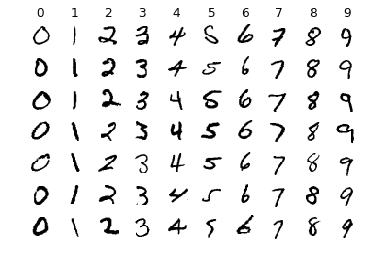

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = list(range(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y == np.argmax(y_train, axis=1))#1代表行
    idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1#将同一类图片显示在同一列
        plt.subplot(samples_per_class, num_classes, plt_idx)
        image = X_train[idx].reshape((28, 28))
        plt.imshow(image, cmap = 'gray_r')
#         print(image)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
import tensorflow as tf
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
# W_1 = tf.Variable(tf.zeros([784, 128]))
#第一层
W_1 = tf.get_variable('W_1', [784, 64], initializer=tf.random_normal_initializer())
# b_1 = tf.Variable(tf.zeros([128]))
b_1 = tf.get_variable('b_1', [64], initializer=tf.random_normal_initializer())
a_1 = tf.matmul(x, W_1) + b_1
z_1 = tf.nn.sigmoid(a_1)

#第二层
# W_2 = tf.Variable(tf.zeros([128, 10]))
W_2 = tf.get_variable('W_2', [64, 32], initializer=tf.random_normal_initializer())
# b_2 = tf.Variable(tf.zeros([10]))
b_2 = tf.get_variable('b_2', [32], initializer=tf.random_normal_initializer())
a_2 = tf.matmul(z_1, W_2) + b_2
z_2 = tf.nn.sigmoid(a_2)

#第三层
# W_3 = tf.Variable(tf.zeros([64, 10]))
W_3 = tf.get_variable('W_3', [32, 10], initializer=tf.random_normal_initializer())
# b_3 = tf.Variable(tf.zeros([10]))
b_3 = tf.get_variable('b_3', [10], initializer=tf.random_normal_initializer())
a_3 = tf.matmul(z_2, W_3) + b_3
z_3 = tf.nn.softmax(a_3)

In [8]:
# Define loss and optimizer
y = tf.placeholder(tf.float32, [None, 10])
#交叉熵
loss = -tf.reduce_sum(y*tf.log(z_3))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)#学习率从0.01降为0.001

Epoch 0 training loss: 59.65162805504365, test acc: 0.5986
Epoch 1 training loss: 34.8272513702735, test acc: 0.6893
Epoch 2 training loss: 28.77069638227861, test acc: 0.7369
Epoch 3 training loss: 25.30537631821777, test acc: 0.7603
Epoch 4 training loss: 23.412551931226705, test acc: 0.7758
Epoch 5 training loss: 22.33598490259542, test acc: 0.7872
Epoch 6 training loss: 21.407277920352865, test acc: 0.7969
Epoch 7 training loss: 20.14962836445527, test acc: 0.8069
Epoch 8 training loss: 19.795930698990578, test acc: 0.8011
Epoch 9 training loss: 19.431575693555434, test acc: 0.8069
Epoch 10 training loss: 19.261912551515913, test acc: 0.8123
Epoch 11 training loss: 17.803763716459773, test acc: 0.8319
Epoch 12 training loss: 17.20903189883815, test acc: 0.8341
Epoch 13 training loss: 17.114153514792903, test acc: 0.8304
Epoch 14 training loss: 16.802815922669012, test acc: 0.8392
Epoch 15 training loss: 16.874945462639687, test acc: 0.8421
Epoch 16 training loss: 16.434429572843563

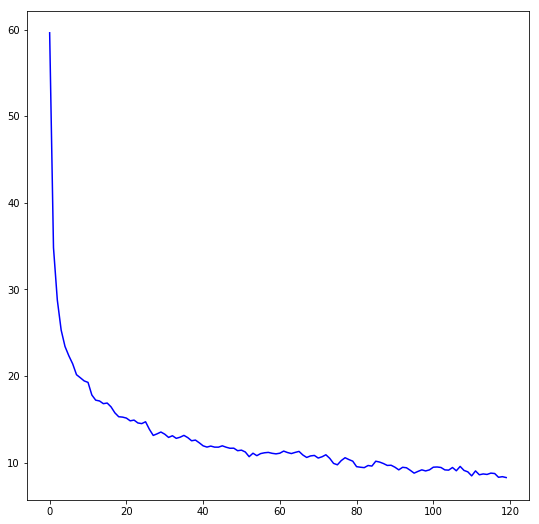

Test some samples


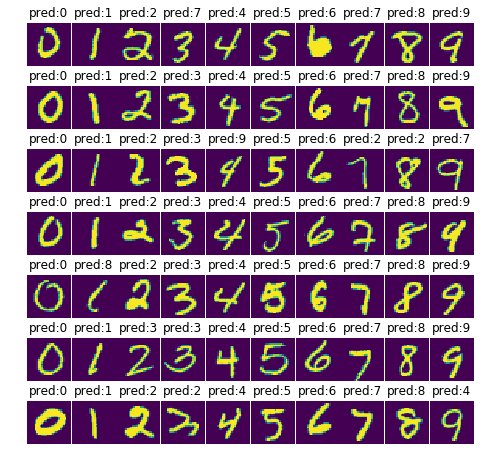

In [9]:
correct_prediction = tf.equal(tf.argmax(a_3, 1), tf.argmax(y, 1)) #(num_training,1),预测正确为1，反之为0
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # tf.int32 注意tf.int32会导致，acc算出来一直为0，reduce_mean可能要求输入为浮点数
init_op = tf.global_variables_initializer()

import matplotlib.gridspec as gridspec

# Train
batch_size = 32
num_epoch = 120
with tf.Session() as sess:
    sess.run(init_op)
    num_train = X_train.shape[0]
    num_batch = int(num_train/batch_size) + 1
    loss_history = []
    for epoch in range(num_epoch):
        avg_cost = 0
        for batch_idx in range(num_batch):
            batch_mask = np.random.choice(num_train,batch_size)
            X_batch = X_train[batch_mask]
            y_batch = y_train[batch_mask]
            _, c = sess.run([train_step,loss], feed_dict={x: X_batch, y: y_batch})
            avg_cost += c / num_batch
        loss_history.append(avg_cost)
        #evaluate
        acc = sess.run(accuracy_op,feed_dict={x: X_test,y: y_test})
        print("Epoch %s training loss: %s, test acc: %s" % (epoch, avg_cost,acc))
#         pred = sess.run(a_2,feed_dict = {x:np.array([X_test[1]])}) #返回的是numpy.ndarray
        #tensor.eval() #tensor 转换为numpy
#         print(pred)
    
    print('plot...')
    plt.figure(figsize=(9,9))
    plt.plot(list(range(num_epoch)),loss_history,'b')#bo为点图，b为线图
    plt.show()
    
    print('Test some samples')
    fig = plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(7, 10)
    gs.update(wspace=0.035, hspace=0.1)  # set the spacing between axes.
    for y_, cls in enumerate(classes):
        idxs = np.flatnonzero(y_ == np.argmax(y_test, axis=1))#1代表行
        idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y_ 
            ax = plt.subplot(gs[plt_idx])
            ax.axis('off')
            plt.imshow(X_test[idx].reshape((28, 28)))
            pred = sess.run(a_3,feed_dict = {x:np.array([X_test[idx]])}) #返回的是numpy.ndarray
            pred = np.argmax(pred,axis = 1)[0]
            plt.title('pred:' + str(pred))
    plt.show()

Epoch 0 training loss: 60.8998772798062, test acc: 0.548
Epoch 1 training loss: 38.22801173419587, test acc: 0.6607
Epoch 2 training loss: 31.377023016720223, test acc: 0.7157
Epoch 3 training loss: 27.329956359192206, test acc: 0.7414
Epoch 4 training loss: 25.170601134107038, test acc: 0.7622
Epoch 5 training loss: 23.649338834067148, test acc: 0.7783
Epoch 6 training loss: 22.275766376747537, test acc: 0.7835
Epoch 7 training loss: 21.39988708521513, test acc: 0.7917
Epoch 8 training loss: 20.649097964961943, test acc: 0.8111
Epoch 9 training loss: 19.36296689230751, test acc: 0.8149
Epoch 10 training loss: 19.3836994041512, test acc: 0.8208
Epoch 11 training loss: 18.736930614595522, test acc: 0.8195
Epoch 12 training loss: 18.048004575121375, test acc: 0.8366
Epoch 13 training loss: 17.661470117345328, test acc: 0.8325
Epoch 14 training loss: 17.39723393657821, test acc: 0.8204
Epoch 15 training loss: 17.755183561524316, test acc: 0.8361
Epoch 16 training loss: 16.994862697780263,

Epoch 136 training loss: 9.08096122096724, test acc: 0.912
Epoch 137 training loss: 9.067113899917732, test acc: 0.9107
Epoch 138 training loss: 8.616049638562108, test acc: 0.9173
Epoch 139 training loss: 8.75053475272936, test acc: 0.9137
Epoch 140 training loss: 8.646231133609948, test acc: 0.9121
Epoch 141 training loss: 8.80914518427748, test acc: 0.9172
Epoch 142 training loss: 8.429385793107423, test acc: 0.9166
Epoch 143 training loss: 8.285196523581238, test acc: 0.9189
Epoch 144 training loss: 8.484742017315885, test acc: 0.9184
Epoch 145 training loss: 8.373050117479961, test acc: 0.9195
Epoch 146 training loss: 8.157292230932454, test acc: 0.9212
Epoch 147 training loss: 8.122474034235438, test acc: 0.92
Epoch 148 training loss: 8.262835253625768, test acc: 0.9225
Epoch 149 training loss: 8.16948764887192, test acc: 0.9192
Epoch 150 training loss: 8.315344364531255, test acc: 0.9173
Epoch 151 training loss: 8.510176561947572, test acc: 0.9112
Epoch 152 training loss: 8.6358

Epoch 271 training loss: 6.717066942612884, test acc: 0.9322
Epoch 272 training loss: 6.443197148218582, test acc: 0.9315
Epoch 273 training loss: 6.652479697551055, test acc: 0.9325
Epoch 274 training loss: 6.241676548221852, test acc: 0.9328
Epoch 275 training loss: 6.502209255054827, test acc: 0.9314
Epoch 276 training loss: 6.48467988325462, test acc: 0.9332
Epoch 277 training loss: 6.471771995745496, test acc: 0.9335
Epoch 278 training loss: 6.508800861789085, test acc: 0.9311
Epoch 279 training loss: 6.323493356786683, test acc: 0.931
Epoch 280 training loss: 6.388633706009222, test acc: 0.9302
Epoch 281 training loss: 6.376695715891775, test acc: 0.9326
Epoch 282 training loss: 6.5877333727758645, test acc: 0.9314
Epoch 283 training loss: 6.336830452084554, test acc: 0.9334
Epoch 284 training loss: 6.4608717140422, test acc: 0.9314
Epoch 285 training loss: 6.3387450619991865, test acc: 0.9351
Epoch 286 training loss: 6.507910548655723, test acc: 0.9328
Epoch 287 training loss: 6

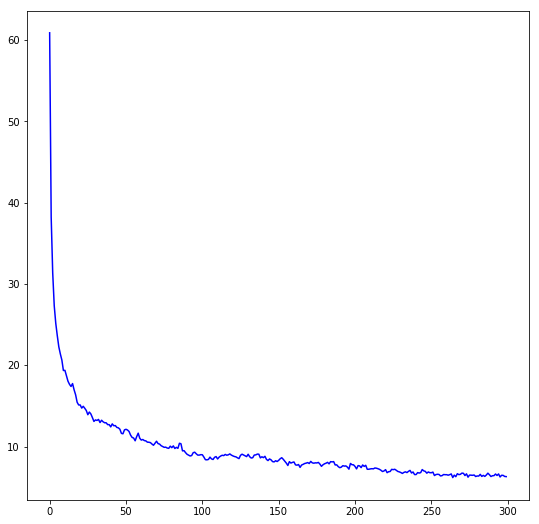

Test some samples


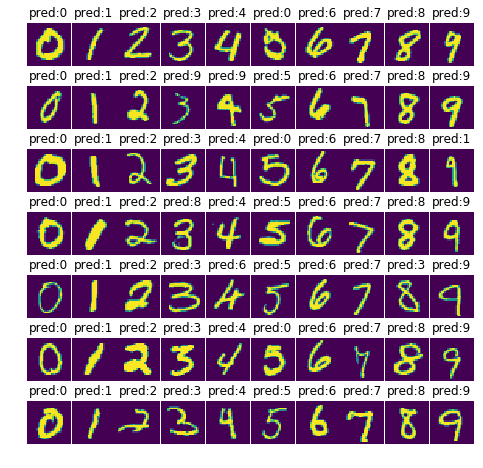

In [10]:
# Train
batch_size = 32
num_epoch = 300
with tf.Session() as sess:
    sess.run(init_op)
    num_train = X_train.shape[0]
    num_batch = int(num_train/batch_size) + 1
    loss_history = []
    for epoch in range(num_epoch):
        avg_cost = 0
        for batch_idx in range(num_batch):
            batch_mask = np.random.choice(num_train,batch_size)
            X_batch = X_train[batch_mask]
            y_batch = y_train[batch_mask]
            _, c = sess.run([train_step,loss], feed_dict={x: X_batch, y: y_batch})
            avg_cost += c / num_batch
        loss_history.append(avg_cost)
        #evaluate
        acc = sess.run(accuracy_op,feed_dict={x: X_test,y: y_test})
        print("Epoch %s training loss: %s, test acc: %s" % (epoch, avg_cost,acc))
#         pred = sess.run(a_2,feed_dict = {x:np.array([X_test[1]])}) #返回的是numpy.ndarray
        #tensor.eval() #tensor 转换为numpy
#         print(pred)
    
    print('plot...')
    plt.figure(figsize=(9,9))
    plt.plot(list(range(num_epoch)),loss_history,'b')#bo为点图，b为线图
    plt.show()
    
    print('Test some samples')
    fig = plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(7, 10)
    gs.update(wspace=0.035, hspace=0.1)  # set the spacing between axes.
    for y_, cls in enumerate(classes):
        idxs = np.flatnonzero(y_ == np.argmax(y_test, axis=1))#1代表行
        idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y_ 
            ax = plt.subplot(gs[plt_idx])
            ax.axis('off')
            plt.imshow(X_test[idx].reshape((28, 28)))
            pred = sess.run(a_3,feed_dict = {x:np.array([X_test[idx]])}) #返回的是numpy.ndarray
            pred = np.argmax(pred,axis = 1)[0]
            plt.title('pred:' + str(pred))
    plt.show()

降低了学习率，loss总的来说下降的比较好，准确率有了大幅提升，但需要更多的epoch，如上图可见，120epochs还没有收敛。300个epochs差不多收敛了。

http://www.tensorfly.cn/tfdoc/how_tos/variables.html   
保存和恢复变量